# Lab 5
### LHC Particle Physics Data
Noah Kim
Section AC

In [25]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import scipy
import pickle
matplotlib.rc('font', size=22)
matplotlib.rc('figure', figsize=(18, 10))

Reading the data

In [26]:
infile1 = open ("higgs_100000_pt_250_500.pkl","rb")
signal_data = pickle.load(infile1)
infile2 = open ("qcd_100000_pt_250_500.pkl", "rb")
qcd_data = pickle.load(infile2)
signal_data.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [27]:
signal = pd.DataFrame(data = signal_data, columns = signal_data.keys())
background = pd.DataFrame(data = qcd_data, columns = qcd_data.keys())
signal[0:20]

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
5,475.798645,1.678998,0.309122,125.676535,0.144900,0.001321,0.434366,0.000124,1.089226,0.095011,0.086523,0.087228,0.910669,0.507167
6,470.814879,-2.123238,-3.034306,127.654008,0.158736,0.003725,0.931205,0.000052,1.072702,0.404063,0.128649,0.376677,0.318388,0.467436
7,471.734591,1.564844,-2.579042,124.166569,0.144069,0.002839,0.949356,0.000381,1.046748,0.258071,0.205686,0.246546,0.797014,0.477715
8,483.043350,1.057999,0.237895,122.130353,0.098300,0.002852,3.002267,0.003114,0.762666,0.402488,0.224324,0.527739,0.557343,0.194003
9,484.359373,1.076703,1.851916,125.191446,0.135803,0.001388,0.554000,0.000601,1.028446,0.107116,0.086189,0.104153,0.804630,0.494019


In [28]:
background[0:20]

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
5,499.007150,-0.852358,-1.648955,52.252029,0.011753,0.000057,35.224665,0.003845,0.729329,0.706101,0.603894,0.968151,0.855251,0.063496
6,457.703594,-0.399451,2.464253,87.720057,0.071941,0.001450,3.893483,0.005817,0.876954,0.622606,0.451220,0.709964,0.724728,0.575403
7,374.490278,-1.767709,0.418387,59.648629,0.038888,0.000517,8.789223,0.000385,0.868643,0.673827,0.587490,0.775724,0.871871,0.339162
8,419.824958,-2.405049,-2.830589,74.236311,0.076338,0.001458,3.276554,0.000063,0.941479,0.701598,0.599033,0.745208,0.853813,0.215824
9,474.301472,0.357243,0.953488,41.904503,0.012366,0.000051,26.875685,0.004167,0.967177,0.845653,0.696237,0.874353,0.823312,0.258695


Background on what the experiment is about

Lab 5a. Download the training datasets from one of the two pT-range folders. In each folder, there are 2 files, each containing 100k jets. The signal dataset is labeled as “higgs” and the background dataset is labeled as “qcd.”

Lab 5b. Explore the training data by addressing following questions:

1. Do all features provide discrimination power between signal and background?
2. Are there correlations among these features?
3. Compute expected discovery sensitivity by normalizing each sample appropriately.
4. Develop a plan to optimize the discovery sensitivity by applying selections to these features.

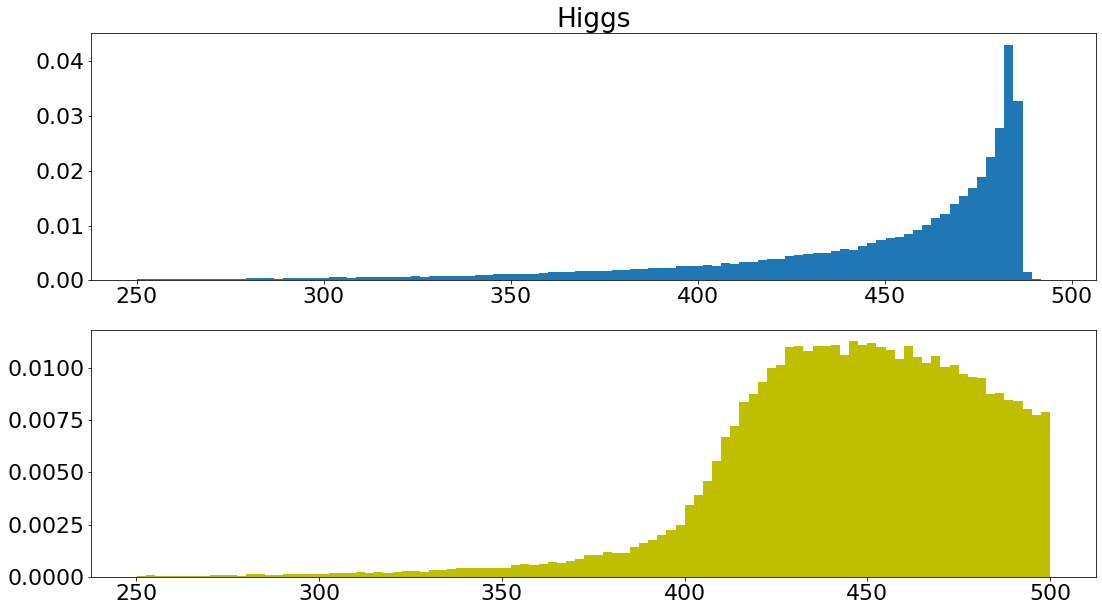

In [43]:
fig, ax = plt.subplots(2,1)
H_pt = signal['pt'][:]
qcd_pt = background['pt'][:]
ax[0].hist(H_pt, bins=100, density=True);
ax[0].set_title('Higgs')
ax[1].hist(qcd_pt, bins=100, density=True, color = 'y');

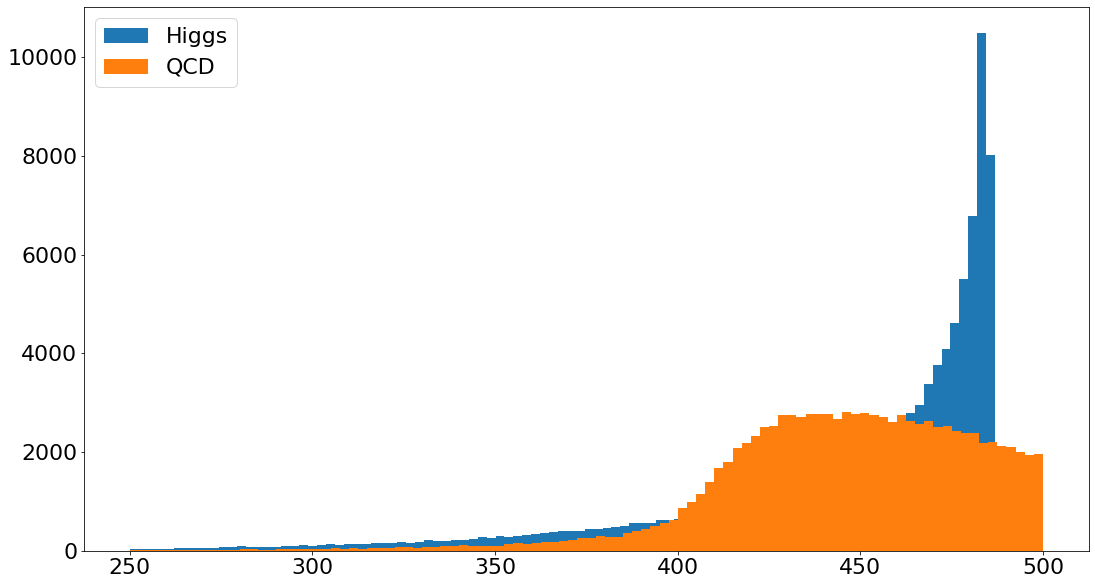

In [45]:
plt.hist(H_pt,bins=100);
plt.hist(qcd_pt,bins=100);
plt.legend(['Higgs', 'QCD']);